In [ ]:
import numpy as np
from numpy import ones
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [ ]:
pop_size = 50
pop_dim= 20
generation_size = 500
u1 = np.array([[np.random.uniform(0,1) for i in range(pop_dim)]  for i in range(pop_size)])
u2 = np.array([[np.random.uniform(0,1) for i in range(pop_dim)] for i in range(pop_size)])

sns.set(style='darkgrid')
sns.set(font_scale=1)
plt.rcParams["figure.figsize"] = (12,6)

# Adaptive Evolution Strategy with 1/5 success rule

##Functions

In [ ]:
def initial (population,sigma):
  for i in range(pop_size):
    s = np.random.uniform(-5,5,pop_dim)
    sig = np.random.normal(0,1,pop_dim)
    population.append(s)
    sigma.append(sig)
  return population,sigma

def rastrigin (x):
  n = len(x)
  f = 10*n
  for tmp in x:
    if tmp < -5.12 or tmp > 5.12:
      f += 10*np.power(tmp, 2)
    else:
      f += np.power(tmp, 2) - 10*np.cos(2*pi*tmp)
  return f

def fitness_rastrigin (population):
  fitness=[]
  for chromosome in population:
    fitness.append(rastrigin(chromosome))
  return fitness

def selectparent (population,sigma):
  parent=[]
  p_sigma=[]
  pindex=np.random.randint(pop_size)
  parent=population[pindex]
  p_sigma=sigma[pindex]
  return parent,p_sigma

def recom_discrete (parent1,parent2,p_sigma1,p_sigma2):
  child=ones(pop_dim)
  sig=ones(pop_dim)
  for i in range(pop_dim):
    if (np.random.rand()<0.5):
      child[i]=parent1[i]
      sig[i]=p_sigma1[i]
    else:
      child[i]=parent2[i]
      sig[i]=p_sigma2[i]
  return child,sig

def recom_intermediate (parent1,parent2,p_sigma1,p_sigma2):
  child=ones(pop_dim)
  sig=ones(pop_dim)
  for i in range(pop_dim):
    child[i]=(parent1[i]+parent2[i])/2
    sig[i]=(p_sigma1[i]+p_sigma2[i])/2
  return child,sig

def creatstep(sigma,count):
  s=np.array(sigma)
  n_sigma=[]
  if (count/len(sigma)) > 0.2:
    n_sigma = s/0.9
  elif (count/len(sigma)) < 0.2:
    n_sigma = s*0.9
  elif (count/len(sigma)) == 0.2:
    n_sigma = s
  return n_sigma.tolist()

def mutation(children,sigma):
  c = len(children)
  for i in range(len(children)):
    for j in range(pop_dim):
      rnChild = np.random.normal(0,1)
      children[i][j] = children[i][j] + (sigma[i][j]*rnChild)
  return children

def survive_select(candid_pop , candid_sigma , candid_fit ):
  condid = np.column_stack((candid_pop,candid_sigma,candid_fit))
  sorted_c = condid[ condid[:, -1].argsort()]
  selected_pop= sorted_c[ 0:pop_size , 0:pop_dim]
  selected_sig= sorted_c[ 0:pop_size , pop_dim:2*pop_dim]
  selected_fit= sorted_c[ 0:pop_size , -1]
  return selected_pop.tolist() , selected_sig.tolist() , selected_fit.tolist()


##ES with discrete recombination and MU + LAMBDA

Generation: 1 431.25737318010545
Generation: 2 431.25737318010545
Generation: 3 377.03606087931723
Generation: 4 377.03606087931723
Generation: 5 377.03606087931723
Generation: 6 376.0322654928197
Generation: 7 376.0322654928197
Generation: 8 365.5279519164833
Generation: 9 365.5279519164833
Generation: 10 365.14874498565086
Generation: 11 301.2799885211377
Generation: 12 301.2799885211377
Generation: 13 301.2799885211377
Generation: 14 301.2799885211377
Generation: 15 301.2799885211377
Generation: 16 301.2799885211377
Generation: 17 301.2799885211377
Generation: 18 282.41209343280786
Generation: 19 282.41209343280786
Generation: 20 277.24985527200266
Generation: 21 237.71491420908356
Generation: 22 237.71491420908356
Generation: 23 237.71491420908356
Generation: 24 219.66670206015272
Generation: 25 219.66670206015272
Generation: 26 219.66670206015272
Generation: 27 207.0079801556525
Generation: 28 207.0079801556525
Generation: 29 207.0079801556525
Generation: 30 182.60769245536397
Gen

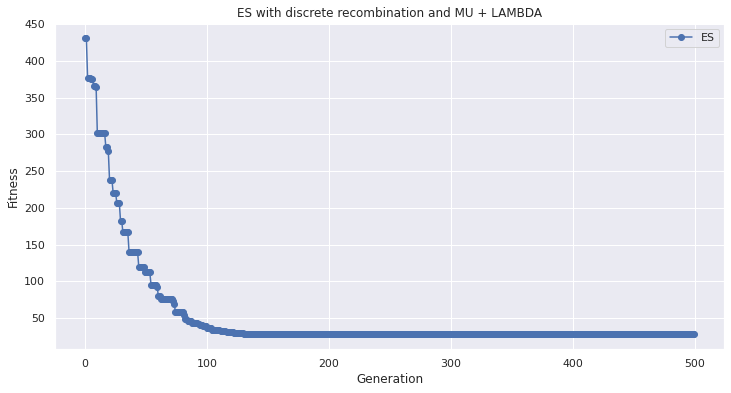

In [ ]:
def main():
  global list1_best_fitness1
  Population = []
  sigma = []
  Population,sigma = initial(Population,sigma)
  f = fitness_rastrigin(Population)
  children = []
  c_sigma = []
  list1_best_fitness1=[]
  Generation=0
  while Generation != generation_size:
    for i in range(pop_size):
        parent1,p_sigma1=selectparent(Population,sigma)
        parent2,p_sigma2=selectparent(Population,sigma)
        child,sig=recom_discrete(parent1,parent2,p_sigma1,p_sigma2)
        children.append(child)
        c_sigma.append(sig)
    
    n_children=mutation(children,c_sigma)
    fo_child = fitness_rastrigin(children)
    f_child = fitness_rastrigin(n_children)
    Count=0
    for i in range(pop_size):
      if fo_child[i] > f_child[i]:
        Count+=1
    n_sigma = creatstep(c_sigma,Count)
    candid_pop=np.array(Population + n_children)
    candid_sigma = np.array(sigma + n_sigma)
    candid_fit =np.array(f + f_child)
    Population , sigma , f = survive_select(candid_pop , candid_sigma , candid_fit)
    list1_best_fitness1.append(f[0])
    Generation+=1
    print("Generation:",Generation , list1_best_fitness1[-1])

  plt.plot(list1_best_fitness1, 'b-o', label="ES")

  plt.title("ES with discrete recombination and MU + LAMBDA")
  plt.xlabel("Generation")
  plt.ylabel("Fitness")
  plt.legend()
  plt.show()

main()

##ES with intermediate recombination and MU + LAMBDA

Generation: 1 340.9122378626563
Generation: 2 290.1059039281247
Generation: 3 243.16501678002632
Generation: 4 243.16501678002632
Generation: 5 221.56848053902343
Generation: 6 221.56848053902343
Generation: 7 211.7108733122181
Generation: 8 211.7108733122181
Generation: 9 205.82265983579828
Generation: 10 205.82265983579828
Generation: 11 192.12579983755813
Generation: 12 192.12579983755813
Generation: 13 180.62174221397282
Generation: 14 180.62174221397282
Generation: 15 180.62174221397282
Generation: 16 180.62174221397282
Generation: 17 177.45915815039834
Generation: 18 148.28034912066684
Generation: 19 148.28034912066684
Generation: 20 146.90841950021655
Generation: 21 146.90841950021655
Generation: 22 139.16633787493853
Generation: 23 139.16633787493853
Generation: 24 114.16283482185696
Generation: 25 114.16283482185696
Generation: 26 114.16283482185696
Generation: 27 114.16283482185696
Generation: 28 106.06338697798472
Generation: 29 103.183090957681
Generation: 30 101.3382080541

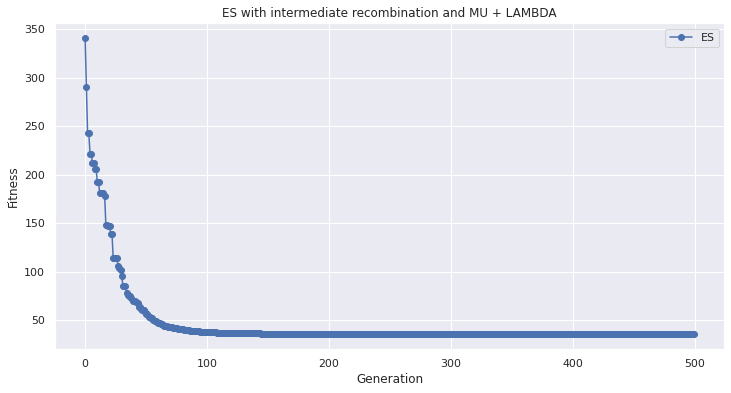

In [ ]:
def main():
  global list1_best_fitness2
  Population = []
  sigma = []
  Population,sigma = initial(Population,sigma)
  f = fitness_rastrigin(Population)
  children = []
  c_sigma = []
  list1_best_fitness2=[]
  Generation=0
  while Generation != generation_size:
    for i in range(pop_size):
        parent1,p_sigma1=selectparent(Population,sigma)
        parent2,p_sigma2=selectparent(Population,sigma)
        child,sig=recom_intermediate(parent1,parent2,p_sigma1,p_sigma2)
        children.append(child)
        c_sigma.append(sig)
    
    n_children=mutation(children,c_sigma)
    fo_child = fitness_rastrigin(children)
    f_child = fitness_rastrigin(n_children)
    Count=0
    for i in range(pop_size):
      if fo_child[i] > f_child[i]:
        Count+=1
    n_sigma = creatstep(c_sigma,Count)
    candid_pop=np.array(Population + n_children)
    candid_sigma = np.array(sigma + n_sigma)
    candid_fit =np.array(f + f_child)
    Population , sigma , f = survive_select(candid_pop , candid_sigma , candid_fit)
    list1_best_fitness2.append(f[0])
    Generation+=1
    print("Generation:",Generation , list1_best_fitness2[-1])

  plt.plot(list1_best_fitness2, 'b-o', label="ES")

  plt.title("ES with intermediate recombination and MU + LAMBDA")
  plt.xlabel("Generation")
  plt.ylabel("Fitness")
  plt.legend()
  plt.show()
main()

##ES with discrete recombination and MU & LAMBDA

Generation: 1 416.2805507512477
Generation: 2 400.2061018896927
Generation: 3 358.02254837228156
Generation: 4 361.95386454340894
Generation: 5 310.008381762208
Generation: 6 299.00625372898224
Generation: 7 305.8382227070489
Generation: 8 258.5603049521784
Generation: 9 277.62816422477255
Generation: 10 262.9019281729355
Generation: 11 222.46458038965662
Generation: 12 200.39778123212417
Generation: 13 182.17227156807024
Generation: 14 173.90566861174494
Generation: 15 177.15838718737433
Generation: 16 176.11861497010693
Generation: 17 163.82795752925554
Generation: 18 162.88339867447425
Generation: 19 143.19004269518584
Generation: 20 115.26543244413395
Generation: 21 125.4744755731752
Generation: 22 112.46539079921703
Generation: 23 107.35589538153064
Generation: 24 100.19046933249004
Generation: 25 97.06060423367276
Generation: 26 87.14508964459884
Generation: 27 65.16950532095359
Generation: 28 73.98998057932945
Generation: 29 66.8961024428867
Generation: 30 56.07779920785816
Gene

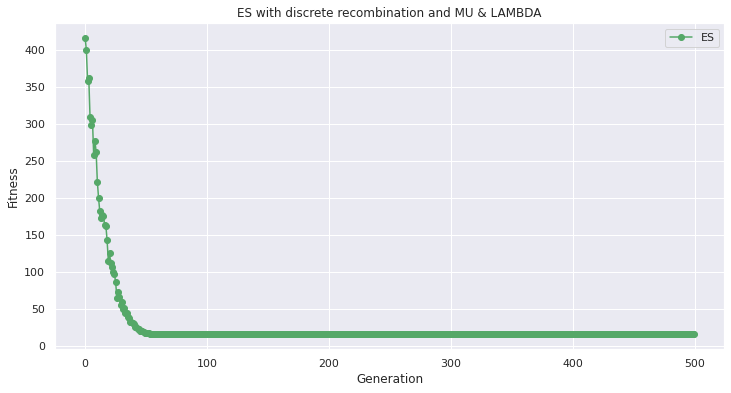

In [ ]:
def main():
  global list1_best_fitness3
  Population = []
  sigma = []
  Population,sigma = initial(Population,sigma)
  f = fitness_rastrigin(Population)
  children = []
  c_sigma = []
  list1_best_fitness3=[]
  Generation=0
  while Generation != generation_size:
    for i in range(pop_size*3):
        parent1,p_sigma1=selectparent(Population,sigma)
        parent2,p_sigma2=selectparent(Population,sigma)
        child,sig=recom_discrete(parent1,parent2,p_sigma1,p_sigma2)
        children.append(child)
        c_sigma.append(sig)
    
    n_children=mutation(children,c_sigma)
    fo_child = fitness_rastrigin(children)
    f_child = fitness_rastrigin(n_children)
    Count=0
    for i in range(pop_size*3):
      if fo_child[i] > f_child[i]:
        Count+=1
    n_sigma = creatstep(c_sigma,Count)
    candid_pop=np.array(n_children)
    candid_sigma = np.array(n_sigma)
    candid_fit =np.array(f_child)
    Population , sigma , f = survive_select(candid_pop , candid_sigma , candid_fit)
    list1_best_fitness3.append(f[0])
    Generation+=1
    print("Generation:",Generation , list1_best_fitness3[-1])

  plt.plot(list1_best_fitness3, 'g-o', label="ES")

  plt.title("ES with discrete recombination and MU & LAMBDA")
  plt.xlabel("Generation")
  plt.ylabel("Fitness")
  plt.legend()
  plt.show()
  
main()

##ES with intermediate recombination and MU & LAMBDA

Generation: 1 301.56149178311455
Generation: 2 260.311616717018
Generation: 3 239.783870944167
Generation: 4 202.1459917335328
Generation: 5 208.63775070480708
Generation: 6 200.1529099740481
Generation: 7 155.2221141377816
Generation: 8 202.03970035893477
Generation: 9 160.93254693704762
Generation: 10 150.53002062226113
Generation: 11 152.93920210966047
Generation: 12 175.76102497233245
Generation: 13 157.16163123844086
Generation: 14 133.13531101529395
Generation: 15 122.79418327198727
Generation: 16 118.49018044083431
Generation: 17 89.11303870918996
Generation: 18 97.18041542670105
Generation: 19 94.82153963080734
Generation: 20 79.59853500138703
Generation: 21 73.94564129673228
Generation: 22 70.1570200918415
Generation: 23 69.62869529086421
Generation: 24 60.765452852848654
Generation: 25 62.24158148002644
Generation: 26 59.72236380301459
Generation: 27 56.98358812432389
Generation: 28 53.94838387731781
Generation: 29 52.69934998926348
Generation: 30 51.625284555012996
Generatio

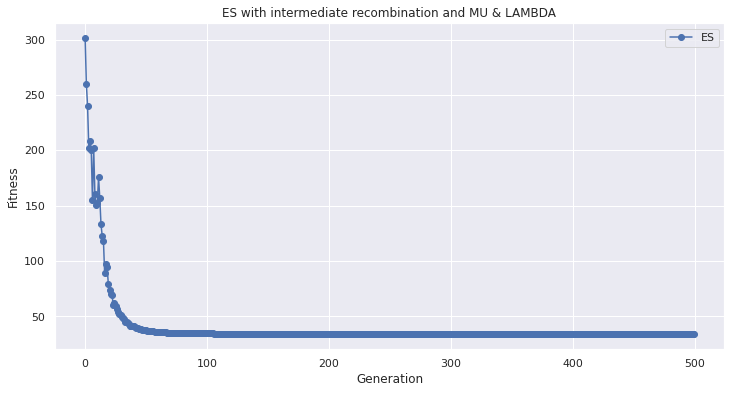

In [ ]:
def main():
  global list1_best_fitness4
  Population = []
  sigma = []
  Population,sigma = initial(Population,sigma)
  f = fitness_rastrigin(Population)
  children = []
  c_sigma = []
  list1_best_fitness4=[]
  Generation=0
  while Generation != generation_size:
    for i in range(pop_size*3):
        parent1,p_sigma1=selectparent(Population,sigma)
        parent2,p_sigma2=selectparent(Population,sigma)
        child,sig=recom_intermediate(parent1,parent2,p_sigma1,p_sigma2)
        children.append(child)
        c_sigma.append(sig)
    
    n_children=mutation(children,c_sigma)
    fo_child = fitness_rastrigin(children)
    f_child = fitness_rastrigin(n_children)
    Count=0
    for i in range(pop_size*3):
      if fo_child[i] > f_child[i]:
        Count+=1
    n_sigma = creatstep(c_sigma,Count)
    candid_pop=np.array(n_children)
    candid_sigma = np.array(n_sigma)
    candid_fit =np.array(f_child)
    Population , sigma , f = survive_select(candid_pop , candid_sigma , candid_fit)
    list1_best_fitness4.append(f[0])
    Generation+=1
    print("Generation:",Generation , list1_best_fitness4[-1])

  plt.plot(list1_best_fitness4, 'b-o', label="ES")

  plt.title("ES with intermediate recombination and MU & LAMBDA")
  plt.xlabel("Generation")
  plt.ylabel("Fitness")
  plt.legend()
  plt.show()
  
main()

##Compare PLOT

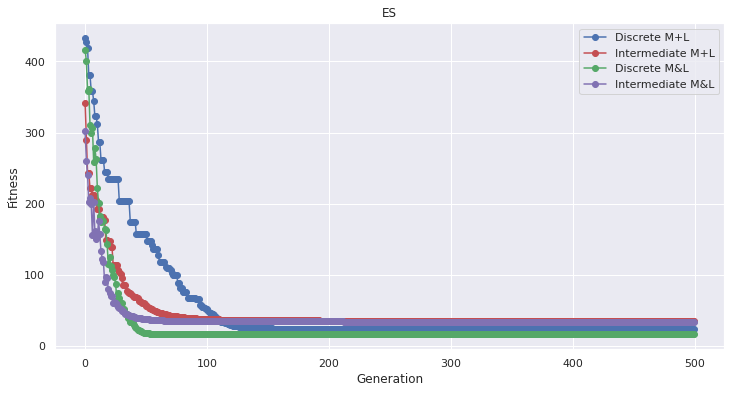

In [ ]:
plt.plot(list1_best_fitness1, 'b-o', label="Discrete M+L")
plt.plot(list1_best_fitness2, 'r-o', label="Intermediate M+L")
plt.plot(list1_best_fitness3, 'g-o', label="Discrete M&L")
plt.plot(list1_best_fitness4, 'm-o', label="Intermediate M&L")

plt.title("ES")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend()

plt.show()

#Particle Swarm Optimisation

##Functions

In [ ]:
def initial_population(population_size, dim):
    bests = []
    population = []
    for i in range(population_size):
        chromosome = np.random.uniform(-5,5,dim)
        population.append(chromosome)
        bests.append(chromosome)
    population = np.array(population)
    bests = np.array(bests)
    best_f, best_gen = find_best_answer(population, dim)
    velocity = np.array(phi1*np.multiply(u1, bests - population) + phi2*np.multiply(u2, best_gen - population))
    bests = population
    return population, velocity, bests

def find_best_answer(population, dim=pop_dim):
    fitnesses = np.array([Rastrigin(x) for x in population])

    all = np.concatenate((population, fitnesses[:, None]), axis=1)
    all = np.array(sorted(all, key=lambda x: x[dim]))
    min_value = all[0,dim]
    genome = all[0,0:dim]
    return min_value, genome

def mutation(children, velocity, bests):
    new_children = []
    f, best_in_pop = find_best_answer(children)
    for i in range(pop_size):
        velocity[i] = w*velocity[i] + phi1*np.multiply(u1[i], (bests[i] - children[i])) + phi2*np.multiply(u2[i], (best_in_pop - children[i]))
        mutate_c = children[i] + velocity[i]
        if Rastrigin(mutate_c) < Rastrigin(children[i]):
            bests[i] = mutate_c
        new_children.append(mutate_c)
    new_children = np.array(new_children)
    return new_children, velocity, bests

##Test algorithm with W = 0.2

generation  1 470.5564334655055
generation  2 365.9127786858078
generation  3 348.97130394674775
generation  4 281.37367416859354
generation  5 268.0019080288503
generation  6 269.0755555824985
generation  7 268.8112597037214
generation  8 268.7829756368639
generation  9 268.77828236352894
generation  10 268.77738208083525
generation  11 263.25493968703256
generation  12 259.8952356859698
generation  13 259.36704628983944
generation  14 259.26719514421234
generation  15 257.2846726111068
generation  16 252.45850944737336
generation  17 251.0429143501399
generation  18 250.5711732289048
generation  19 250.46755927056913
generation  20 250.44645558540634
generation  21 242.44759819631437
generation  22 244.22991100706903
generation  23 242.89736173250913
generation  24 216.68998566907342
generation  25 205.11485014842975
generation  26 204.11376146234358
generation  27 203.9706863785097
generation  28 203.9443678547368
generation  29 199.9885229917461
generation  30 200.20105588023696
ge

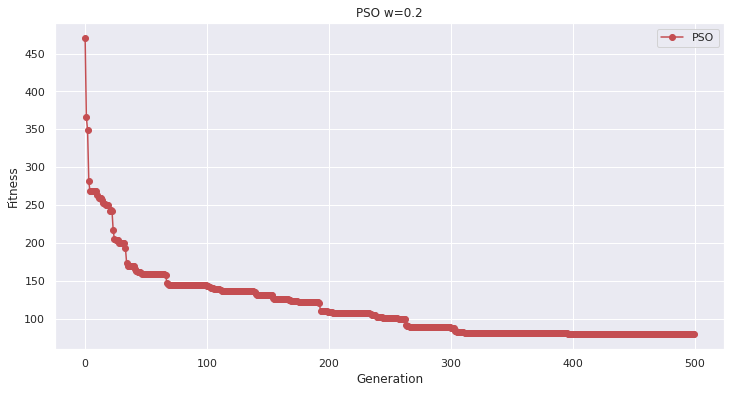

In [ ]:
w=0.2
phi1=0.7
phi2=0.4

def main():
    global list2_best_fitness1
    generation = 0
    list2_best_fitness1 = []
    population, velocity, bests = initial_population(pop_size, pop_dim)
    
    while generation < generation_size:
        a, b = find_best_answer(population, pop_dim)
        list2_best_fitness1.append(a)
        print('generation ', generation+1, a)
        population, velocity, bests = mutation(population, velocity=velocity, bests=bests)
        generation += 1
    plt.plot(list2_best_fitness1, 'r-o', label="PSO")

    plt.title("PSO w=0.2")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.legend()
    plt.show()

main()

##Test algorithm with W = 0.4

generation  1 411.659533271217
generation  2 384.6722391559258
generation  3 323.76626274954504
generation  4 275.52103337735116
generation  5 322.268929995954
generation  6 272.3731678918816
generation  7 292.02398132727205
generation  8 276.82739453417423
generation  9 241.7135116675466
generation  10 256.52761336659034
generation  11 258.890373469484
generation  12 254.70908100364284
generation  13 254.00590406461902
generation  14 253.89076990661408
generation  15 245.82488670591945
generation  16 243.18431753507951
generation  17 243.73986533326905
generation  18 240.98408347622802
generation  19 246.60103710664504
generation  20 249.054570892478
generation  21 245.21706060012895
generation  22 228.1379989171931
generation  23 252.15491944611804
generation  24 249.45318143467335
generation  25 223.46754495762605
generation  26 207.04386687012283
generation  27 225.5012195265046
generation  28 195.52000376630187
generation  29 186.66186880871936
generation  30 193.76498717060394
ge

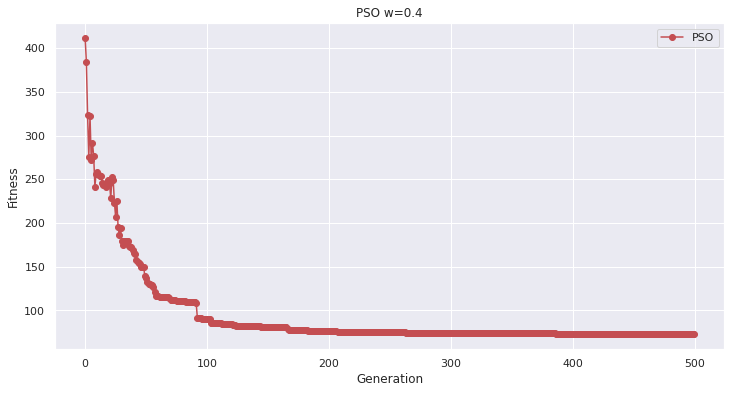

In [ ]:
w=0.4
phi1=0.7
phi2=0.4

def main():
    global list2_best_fitness2
    generation = 0
    list2_best_fitness2 = []
    population, velocity, bests = initial_population(pop_size, pop_dim)
    
    while generation < generation_size:
        a, b = find_best_answer(population, pop_dim)
        list2_best_fitness2.append(a)
        print('generation ', generation+1, a)
        population, velocity, bests = mutation(population, velocity=velocity, bests=bests)
        generation += 1
    plt.plot(list2_best_fitness2, 'r-o', label="PSO")

    plt.title("PSO w=0.4")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.legend()
    plt.show()

main()

##Test algorithm with W = 0.6

generation  1 466.90096051194575
generation  2 381.4449438299258
generation  3 329.0130338953485
generation  4 332.47373831868686
generation  5 291.8453057487754
generation  6 312.95079338312365
generation  7 296.80937827545443
generation  8 300.7436408447813
generation  9 282.9028274939805
generation  10 232.05023706562986
generation  11 186.9245375073446
generation  12 208.81542302479056
generation  13 205.93997204241276
generation  14 205.1710217981868
generation  15 210.45683311864627
generation  16 212.45581840572223
generation  17 207.10490318056833
generation  18 196.3519167823792
generation  19 194.33847070934976
generation  20 191.45095711295096
generation  21 192.02852985960374
generation  22 187.29203532553979
generation  23 177.4319327672346
generation  24 175.5513348797811
generation  25 168.29575321855094
generation  26 168.58811594753521
generation  27 169.2282341006202
generation  28 169.40224777876534
generation  29 169.31054415343337
generation  30 160.59415541847162


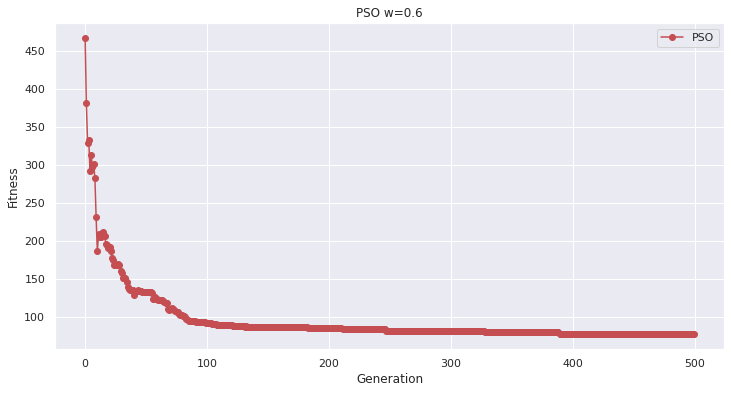

In [ ]:
W=0.6
phi1=0.1
phi2=0.3

def main():
    global list2_best_fitness3
    generation = 0
    list2_best_fitness3 = []
    population, velocity, bests = initial_population(pop_size, pop_dim)
    
    while generation < generation_size:
        a, b = find_best_answer(population, pop_dim)
        list2_best_fitness3.append(a)
        print('generation ', generation+1, a)
        population, velocity, bests = mutation(population, velocity=velocity, bests=bests)
        generation += 1
    plt.plot(list2_best_fitness3, 'r-o', label="PSO")

    plt.title("PSO w=0.6")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.legend()
    plt.show()

main()

##Test algorithm with W = 0.8

generation  1 443.80821833668654
generation  2 340.5973742360285
generation  3 309.67352215854066
generation  4 327.15773887892095
generation  5 348.6071429584932
generation  6 341.2125012693423
generation  7 321.6609799969126
generation  8 320.77800754053493
generation  9 267.5941993211608
generation  10 300.73368491256156
generation  11 322.02731692560917
generation  12 298.97287095322037
generation  13 259.89237170521585
generation  14 246.18100515957818
generation  15 272.5097321396255
generation  16 247.06740217736342
generation  17 275.96401917015567
generation  18 264.9844166197494
generation  19 256.11896758247656
generation  20 247.0912039766344
generation  21 244.11445435670683
generation  22 226.07661897577339
generation  23 217.86338431089376
generation  24 249.9389528041194
generation  25 234.29079690670562
generation  26 213.77070328125808
generation  27 171.57993124278173
generation  28 171.0401761670981
generation  29 183.7150323360148
generation  30 190.41751271482076


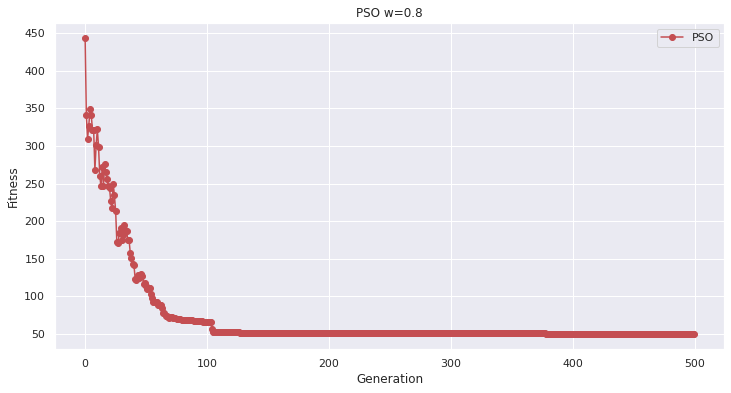

In [ ]:
w=0.8
phi1=0.1
phi2=0.3

def main():
    global list2_best_fitness4
    generation = 0
    list2_best_fitness4 = []
    population, velocity, bests = initial_population(pop_size, pop_dim)
    
    while generation < generation_size:
        a, b = find_best_answer(population, pop_dim)
        list2_best_fitness4.append(a)
        print('generation ', generation+1, a)
        population, velocity, bests = mutation(population, velocity=velocity, bests=bests)
        generation += 1
    plt.plot(list2_best_fitness4, 'r-o', label="PSO")

    plt.title("PSO w=0.8")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.legend()
    plt.show()

main()

##Compare PLOT

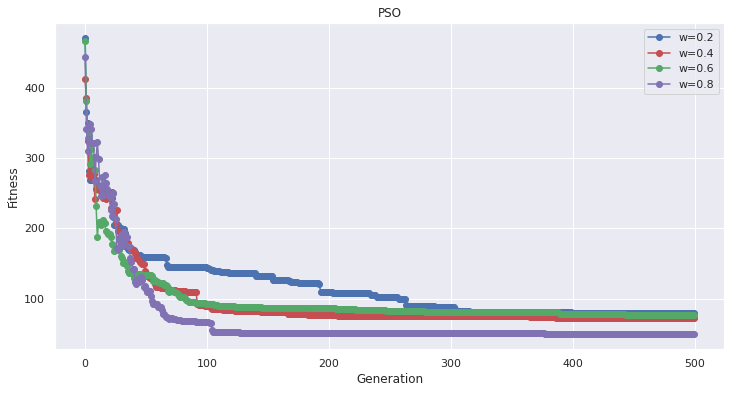

In [ ]:
plt.plot(list2_best_fitness1, 'b-o', label="w=0.2")
plt.plot(list2_best_fitness2, 'r-o', label="w=0.4")
plt.plot(list2_best_fitness3, 'g-o', label="w=0.6")
plt.plot(list2_best_fitness4, 'm-o', label="w=0.8")

plt.title("PSO")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend()

plt.show()

#Differential Evolution

##Functions

In [ ]:
def initial_population(population_size, dim):
    population = []
    for i in range(population_size):
        chromosome = np.random.uniform(-5,5,dim)
        population.append(chromosome)
    return population

def find_best_answer(population, dim):
    fitnesses = np.array([Rastrigin(x) for x in population])

    all = np.concatenate((population, fitnesses[:, None]), axis=1)
    all = np.array(sorted(all, key=lambda x: x[dim]))
    min_value = all[0,dim]
    genome = all[0,0:dim]
    return min_value, genome

def Rastrigin(x):
    return 10*len(x) + sum(x**2 - 10 * np.cos(2 * np.pi * x))

def mutation(children):
    new_children = []
    F = 0.2
    for i in range(len(children)):
        indexes = [np.random.randint(0, len(children)) for i in range(3)]
        new_x = children[indexes[0]] + F * (children[indexes[1]] - children[indexes[2]])
        new_children.append(new_x)
        new_children.append(children[i])

    new_children = np.array(new_children)
    return new_children

def crossover(population, population_size, dim):
    children = []
    incriminator = 0
    while incriminator < population_size:
        parent1 = population[incriminator]
        incriminator += 1
        parent2 = population[incriminator]
        incriminator += 1
        r = np.random.randint(0, dim)
        tmp = np.concatenate((parent1[0:r],parent2[r:dim]), axis=0)
        tp = np.concatenate((parent2[0:r],parent1[r:dim]), axis=0)
        children.append(tmp)
        children.append(tp)

    children = np.array(children)

    return children

def generate_new_population(population, new_pop):
    increminator = 0
    survived_population = []
    while increminator < len(new_pop):
        genome1 = new_pop[increminator]
        increminator += 1
        genome2 = new_pop[increminator]
        increminator += 1
        if Rastrigin(genome1) < Rastrigin(genome2):
            survived_population.append(genome1)
        else:
            survived_population.append(genome2)
    survived_population = np.array(survived_population)
    return survived_population

def find_best_answer(population, dim):
    fitnesses = np.array([Rastrigin(x) for x in population])
    all = np.concatenate((population, fitnesses[:, None]), axis=1)
    all = np.array(sorted(all, key=lambda x: x[dim]))
    min_value = all[0,dim]
    genome = all[0,0:dim]
    return min_value, genome

##Algorithm

generation :  1 460.04283619168655
generation :  2 454.3555408408509
generation :  3 377.6024656594495
generation :  4 387.92196478193677
generation :  5 367.9847459496113
generation :  6 396.6979530526082
generation :  7 355.65242079061926
generation :  8 376.56131253001763
generation :  9 366.3474937973805
generation :  10 312.4768314671125
generation :  11 308.6331700775626
generation :  12 341.59916716316707
generation :  13 333.9215074619264
generation :  14 245.30177479284592
generation :  15 294.86524992157473
generation :  16 319.18897799252477
generation :  17 286.70816132106626
generation :  18 305.5401571657622
generation :  19 304.390638521309
generation :  20 323.10262632542714
generation :  21 302.4457587481765
generation :  22 282.27548168653686
generation :  23 259.36664701116837
generation :  24 267.6038017983698
generation :  25 268.67034533531313
generation :  26 268.67034533531313
generation :  27 272.6137261513674
generation :  28 263.0026191655955
generation :  29

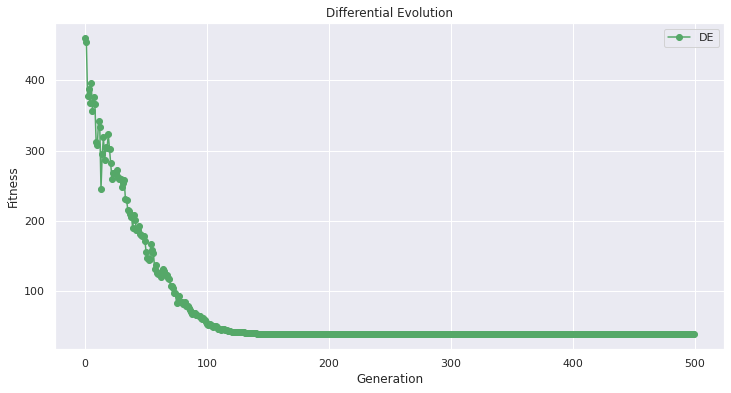

In [ ]:
def main():
    global list3_best_fitness
    list3_best_fitness = []
    generation = 0

    population = initial_population(pop_size, pop_dim)

    while generation < generation_size:
        a, b = find_best_answer(population, pop_dim)
        list3_best_fitness.append(a)
        print('generation : ', generation+1, a)

        children = mutation(population)
        children = crossover(children, pop_size, pop_dim)
        population = generate_new_population(population, children)
        generation += 1

    plt.plot(list3_best_fitness, 'g-o', label="DE")

    plt.title("Differential Evolution")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.legend()
    plt.show()

main()

#Compare algorithms

In [ ]:
print("ES fitnesses: ")
print("\tES with discrete recombination and MU + LAMBDA: ",list1_best_fitness1[-1], 
      "\n\tES with intermediate recombination and MU + LAMBDA: ",list1_best_fitness2[-1], 
      "\n\tES with discrete recombination and MU & LAMBDA: ",list1_best_fitness3[-1], 
      "\n\tES with intermediate recombination and MU & LAMBDA: ",list1_best_fitness4[-1])

print("\nPSO fitnesses: ")
print("\tPSO w=0.2: ",list2_best_fitness1[-1], 
      "\n\tPSO w=0.4: ",list2_best_fitness2[-1], 
      "\n\tPSO w=0.6: ",list2_best_fitness3[-1], 
      "\n\tPSO w=0.8: ",list2_best_fitness4[-1])

print("\nDE fitnesses: ")
print("\tDE: ",list3_best_fitness[-1])

ES fitnesses: 
	ES with discrete recombination and MU + LAMBDA:  24.09743730329285 
	ES with intermediate recombination and MU + LAMBDA:  35.13256580178205 
	ES with discrete recombination and MU & LAMBDA:  15.995204786208092 
	ES with intermediate recombination and MU & LAMBDA:  33.758023423981626

PSO fitnesses: 
	PSO w=0.2:  79.37428648346034 
	PSO w=0.4:  72.53081769681035 
	PSO w=0.6:  77.4032999532856 
	PSO w=0.8:  49.00837252684363

DE fitnesses: 
	DE:  38.808364092277714


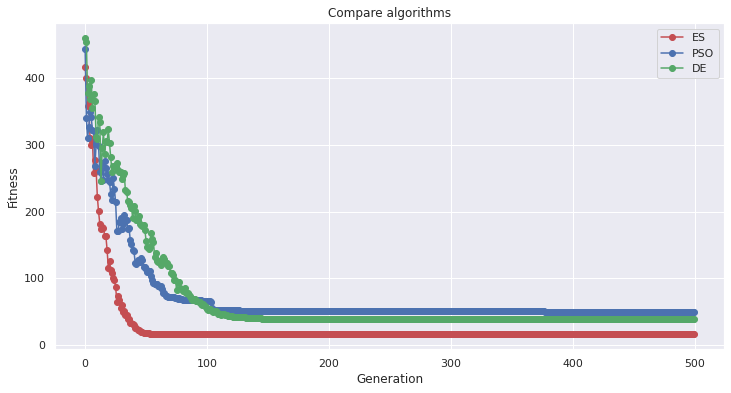

In [ ]:
plt.plot(list1_best_fitness3, 'r-o', label="ES")
plt.plot(list2_best_fitness4, 'b-o', label="PSO")
plt.plot(list3_best_fitness, 'g-o', label="DE")

plt.title("Compare algorithms")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend()
plt.show()